# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 1 - Handling Imbalanced datasets </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/MLF/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/13gJd7uJeJgFDoF-pKRLWzo8A-9XsIRrO?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

# Description of the programming session

In this programming session, we will deal with a **Fraud Detection** problem.

* The dataset is composed of 10000 rows.
* Each row contains 30 features which are the result of a PCA transformation. 
* Each feature vector is associated with a binary target: The target takes value 1 in case of a fraud and 0 otherwise. 
* The dataset is highly imbalanced since only 400 samples are associated with a target 1 (fraud). 





# Loading and visualizing the data 


---
<font color=green>Q1:</font>
<br><font color='green'>
Import the following modules:
* `pandas` to manipulate dataframes
* `seaborn` for fancy plots
* `matplotlib.pyplot` for plots
* `numpy` to manipulate arrays
* `os` to specify your paths
</font>

---


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('dark_background') # to adapt the colors to a dark background
import numpy as np
import os

---
<font color=green>Q2:</font>
<br><font color='green'>
[Only if you're using Colab]. Connect your colab to your drive to have access to the data.
</font>

---

In [2]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.getcwd()

'/content'

---
<font color=green>Q3:</font>
<br><font color='green'>
Change your current directory to be in the repository containing your data using: `os.chdir(<path to your data>)`
</font>

---

In [4]:
os.chdir("./gdrive/My Drive/Teaching/Imperial_College/Colab Notebooks/Programming_session_1/")

---
<font color=green>Q4:</font>
<br><font color='green'>
Load the data using the command `pd.read_csv(<name of the csv file>, index_col=0)`
</font>

---

In [5]:
df = pd.read_csv("credit_data.csv", index_col=0)

In [6]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,Class
0,2.066860,-0.020046,-1.767555,0.733844,0.273100,-0.759437,0.030152,-0.196861,0.970792,-0.436721,...,0.134090,-0.044286,-0.711986,0.196494,0.499970,-0.038726,-0.045336,-0.181653,0.674808,0
1,-3.174988,2.565829,-1.166506,-2.662460,-0.563333,-1.758946,0.158992,1.060015,0.846993,0.084840,...,-0.933422,0.196827,-0.132664,0.321662,0.410302,0.403295,0.305377,-0.293440,0.035762,0
2,-1.358615,-0.694513,0.663246,-0.918161,2.429012,-0.748662,-0.137744,0.109871,1.414226,-1.288576,...,0.351336,-0.169299,0.187691,0.344757,0.024591,0.007354,0.141657,-0.261301,0.151694,0
3,-10.290219,-2.815842,-3.015308,0.670187,-0.323126,-0.012862,2.315149,-1.951854,2.914832,3.560149,...,-1.293607,-1.589622,0.994588,-1.024713,-0.792314,-3.596743,-2.944840,1.928596,0.525946,0
4,2.066360,-1.862311,-0.043096,-1.562647,-1.844436,0.263880,-1.849429,0.190699,-0.890452,1.594112,...,0.208154,0.313158,0.745770,-0.576860,-0.309670,0.047811,-0.020008,0.825683,0.416370,0
5,-1.837129,-0.860606,0.931402,-0.503311,-1.601545,-0.063339,-1.372122,1.010606,-1.067833,0.098599,...,1.208618,-0.385332,0.098418,-0.539129,-0.058342,0.079373,-0.311260,1.802557,-0.220926,0
6,-0.867614,0.399972,2.307767,-1.404864,-0.114899,-0.423631,0.303280,0.036647,-1.323148,-0.326257,...,-0.804946,-0.240922,-0.199841,0.442245,-0.723910,0.059379,0.071508,-0.175924,-0.086279,0
7,1.115158,-0.146839,1.371551,0.885772,-1.002526,-0.010030,-0.644337,0.147296,0.793339,-0.306381,...,0.165533,0.091804,0.456225,0.162527,0.323973,0.038653,0.028735,-0.178998,-0.146477,0
8,-0.812699,0.748278,0.787756,0.834942,0.939194,0.226452,0.287562,0.316810,-0.310771,0.427272,...,0.819531,-0.133640,-0.253254,-0.515717,-0.274483,0.652148,0.277662,-0.288130,-0.612331,0
9,1.142330,0.166046,0.020068,0.895144,0.357465,0.442464,0.020008,0.097501,-0.316402,0.157162,...,0.353184,-0.237013,-0.811310,0.694927,-0.220900,0.027286,0.007137,0.237407,-0.361506,0


The dataframe contains 31 columns:
* 30 features representing the 30 first dimenions of a PCA applied to the original dataset.
* The column **Class** representing the binary target:
  * The target 1 means there is a Fraud.
  * The target 0 means there is no Fraud.

---
<font color=green>Q5:</font>
<br><font color='green'>
Using `sns.scatterplot()`
* Create a scatter plot to visualise `feature_4` on the x-axis and `feature_3` on the y axis.  
* Create a scatter plot to visualise `feature_20` on the x-axis and `feature_15` on the y axis. 
* In which of the two scatter plots do we have data points which are linearly separable ? 
</font>

---

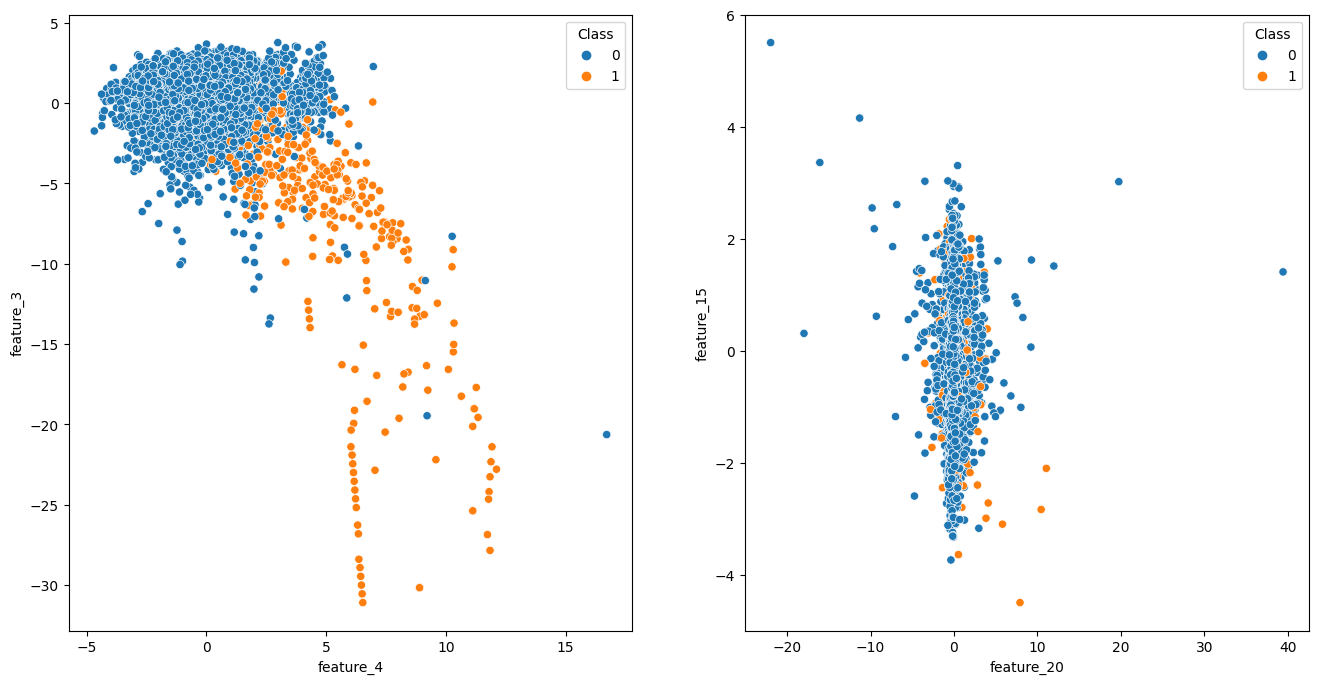

In [7]:
# create a visual plot to see the target distribution
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x='feature_4', y = 'feature_3', data=df, hue='Class', ax=ax[0])
sns.scatterplot(x='feature_20', y = 'feature_15', data=df, hue='Class', ax=ax[1])
plt.show()

---
<font color=green>Q6:</font>
<br><font color='green'>
Using `sns.countplot`, create a plot to see the target distribition. Do we have a balanced dataframe ? Is the accuracy metric a good evaluation metric ? 
</font>

---


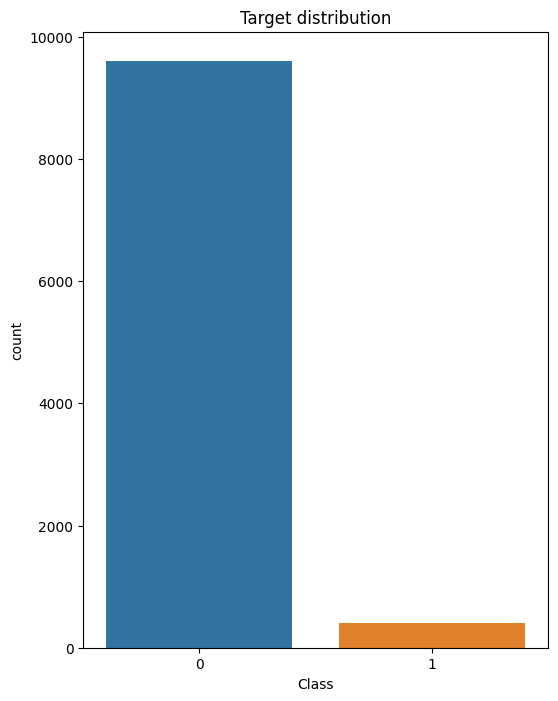

In [8]:
# create a visual plot to see the target distribution
fig = plt.figure(figsize=(6, 8))
g = sns.countplot(x="Class", data=df)
g.set_title("Target distribution")
plt.show()

The dataset is highly imbalanced. The accuracy metric is not a good evaluation metric. 

# Evaluation Metrics

## The Recall

Let us recall the definition of the confusion matrix:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1agZSryLBlfSOeoUGxH0HmIJdroIdM5ZA"></center>

As we want to minimize the type 2 error (which is missing a Fraud), the **recall** is a good evaluation metric.




## Another way of understanding the AUC evaluation metric



As explained in Lecture 1, the AUC is defined as the area under the curve, i.e, the area between the curve and the x-axis. 

* Let us consider a dataset $\mathcal{S} = \{ (x_1, y_1), \dots, (x_n, y_n) \}$ where $\forall i \in \{1, \dots, n\} \quad x_i \in \mathbb{R}^d, \ y_i \in \{0, 1\} \}$

* A classification algorithm (like Random Forest), trained on $\mathcal{S}$, maps each new obersvation $x^* \in \mathbb{R}^d$ to a score $\hat{p}(x^*) \in [0, 1]$ signifying the algorithm's confidence that the label of $x^*$ is $y^* = 1$. 


* Let us split the training feature vectors  $\{(x_i)\}_{1 \leq i \leq n}$ into two groups:
  * A group $\mathcal{G}_+$ of feature vectors associated with the positive label.  
  * A group $\mathcal{G}_-$ of feature vectors associated with the negative label.

* We can then represent two distribution of scores: 
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_+$ 
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_-$ 

* The figure below summarizes the process described. 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=17AynSe1QDaiZR-_9FpVQMfOzKRdR_Lfi"></center>

* Let us represent the two distributions in one figure: 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1tKSqfs1ITKikr8F4oaRSs6t2HLN0hIIf"></center>


* The **AUC** can be interpreted as a measure of the quality of seperation between the aforementioned distributions. 

* Mathematically speaking, the **AUC** gives the probability that the classifier gives a higher score to a positive sample than to a negative sample. (you can read the proof in the [optional reading](https://colab.research.google.com/drive/1gcbB3-3Y6AfohDFJYKmFPF2G-4EIPDTi?usp=sharing)). 

# Defining a baseline model

### Splitting the dataset into train set and test set

In [9]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,Class
0,2.066860,-0.020046,-1.767555,0.733844,0.273100,-0.759437,0.030152,-0.196861,0.970792,-0.436721,...,0.134090,-0.044286,-0.711986,0.196494,0.499970,-0.038726,-0.045336,-0.181653,0.674808,0
1,-3.174988,2.565829,-1.166506,-2.662460,-0.563333,-1.758946,0.158992,1.060015,0.846993,0.084840,...,-0.933422,0.196827,-0.132664,0.321662,0.410302,0.403295,0.305377,-0.293440,0.035762,0
2,-1.358615,-0.694513,0.663246,-0.918161,2.429012,-0.748662,-0.137744,0.109871,1.414226,-1.288576,...,0.351336,-0.169299,0.187691,0.344757,0.024591,0.007354,0.141657,-0.261301,0.151694,0
3,-10.290219,-2.815842,-3.015308,0.670187,-0.323126,-0.012862,2.315149,-1.951854,2.914832,3.560149,...,-1.293607,-1.589622,0.994588,-1.024713,-0.792314,-3.596743,-2.944840,1.928596,0.525946,0
4,2.066360,-1.862311,-0.043096,-1.562647,-1.844436,0.263880,-1.849429,0.190699,-0.890452,1.594112,...,0.208154,0.313158,0.745770,-0.576860,-0.309670,0.047811,-0.020008,0.825683,0.416370,0
5,-1.837129,-0.860606,0.931402,-0.503311,-1.601545,-0.063339,-1.372122,1.010606,-1.067833,0.098599,...,1.208618,-0.385332,0.098418,-0.539129,-0.058342,0.079373,-0.311260,1.802557,-0.220926,0
6,-0.867614,0.399972,2.307767,-1.404864,-0.114899,-0.423631,0.303280,0.036647,-1.323148,-0.326257,...,-0.804946,-0.240922,-0.199841,0.442245,-0.723910,0.059379,0.071508,-0.175924,-0.086279,0
7,1.115158,-0.146839,1.371551,0.885772,-1.002526,-0.010030,-0.644337,0.147296,0.793339,-0.306381,...,0.165533,0.091804,0.456225,0.162527,0.323973,0.038653,0.028735,-0.178998,-0.146477,0
8,-0.812699,0.748278,0.787756,0.834942,0.939194,0.226452,0.287562,0.316810,-0.310771,0.427272,...,0.819531,-0.133640,-0.253254,-0.515717,-0.274483,0.652148,0.277662,-0.288130,-0.612331,0
9,1.142330,0.166046,0.020068,0.895144,0.357465,0.442464,0.020008,0.097501,-0.316402,0.157162,...,0.353184,-0.237013,-0.811310,0.694927,-0.220900,0.027286,0.007137,0.237407,-0.361506,0


---
<font color=green>Q7:</font>
<br><font color='green'>
Extract from the dataframe the following matrices:
* X of shape (10000, 30): the matrix containing the 30 features for all the samples
* Y of shape (10000, 1): the matrix containing the binary target.
</font>

---

In [10]:
np.squeeze(df[["Class"]].values).shape

(10000,)

In [11]:
# Extract the feature matrix
X = df.drop("Class", 1).values
# Extract the target
Y = np.squeeze(df[["Class"]].values)

<ipython-input-11-587e77001f75>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Class", 1).values


In [12]:
# Shape of X
X.shape

(10000, 30)

In [13]:
# Shape of Y
Y.shape

(10000,)

---
<font color=green>Q8:</font>
<br><font color='green'>
* Using `train_test_split` from `sklearn.model_selection`, split the data into training set and test set. 
* Use 30% of the data for the test. 
</font>

---


In [14]:
# Import the module
from sklearn.model_selection import train_test_split
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
# Shape of X_train
X_train.shape

(7000, 30)

In [16]:
# Shape of y_train
y_train.shape

(7000,)

In [17]:
# Shape of X_test  
X_test.shape 

(3000, 30)

In [18]:
# Shape of y_test
y_test.shape

(3000,)

### A baseline model

---
<font color=green>Q9:</font>
<br><font color='green'>
* Import the **Random Forest** classifier from `sklearn.ensemble` and name it `rf`.
* Fit the model to the training data using `rf.fit()`
</font>

---

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)




* The method `rf.predict_proba()` maps each element $x$ to a prediction (or a score) $p(x) \in [0, 1]$ reflecting the confidence of the classifier in assigning the target $y=1$ to the feature vector $x$. 


<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1znqNbk_1GLWeTgxf3PU0HcGg1r1L-uLo"></center>


* In order to convert the continuous prediciton $p(x)$ into a binary prediction $\hat{y} \in \{0, 1 \}$, we need to choose a **threshold** above which we assign the positive label.

* The default threshold is 0.5 and the method used to map $x$ to a binary output with this default threshold 0.5 is `rf.predict()`

---
<font color=green>Q10:</font>
<br><font color='green'>
By using the methods previously described, calculate the vector `y_hat` corresponding to the binary predictions associated with `X_test` corresponding to a threshold 0.5. 
</font>

---

In [20]:
# Calculating y_hat
y_hat = rf.predict(X_test)

---
<font color=green>Q11:</font>
<br><font color='green'>
By importing `confusion_matrix` from `sklearn.metrics`, create a visual plot of the confusion matrix on test set. 
</font>

---


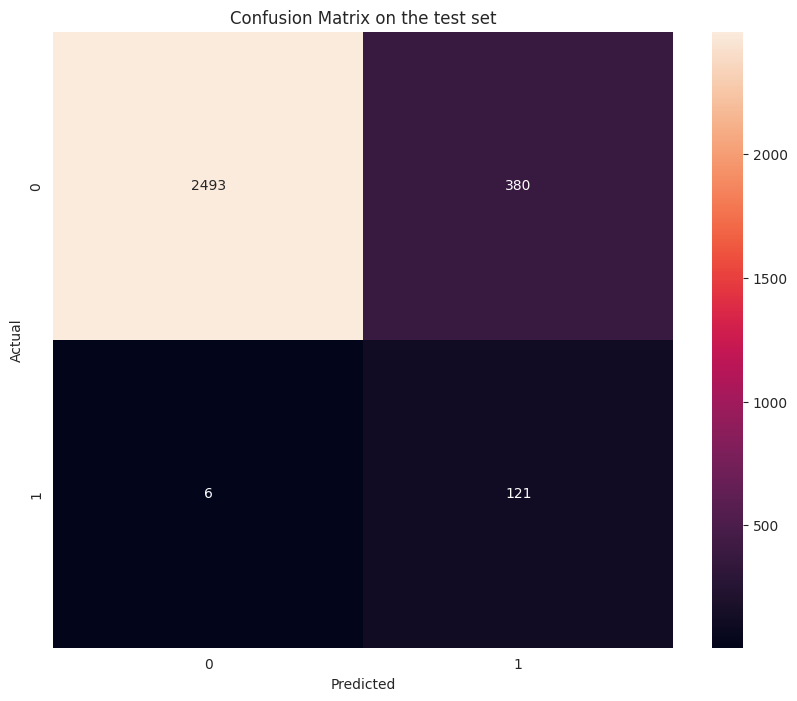

In [44]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(10, 8))
g = sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            fmt="0.0f")
g.set_xlabel("Predicted")
g.set_ylabel("Actual")
g.set_title("Confusion Matrix on the test set")
plt.show()

---
<font color=green>Q12:</font>
<br><font color='green'>
By importing `classification_report` from `sklearn.metrics`, display the following metrics:
* The precision.
* The recall.
* The f1 score.
</font>

---

In [22]:
# print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2873
           1       0.98      0.84      0.91       127

    accuracy                           0.99      3000
   macro avg       0.99      0.92      0.95      3000
weighted avg       0.99      0.99      0.99      3000



# Improving the model

### Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class. 

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$. 
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$. 

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Q13:</font>
<br><font color='green'>
By using `SMOTE` from `imblearn.over_sampling`, create a new dataset $(X_{\text{smote}}, y_{\text{smote}})$ obtained by oversamping from the negative class $\mathcal{G}_-$ using the aformentioned SMOTE technique.
</font>

---

In [23]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [24]:
# sanity check
assert 2*np.sum(1 - y_train) == X_smote.shape[0], "Oupsii !!"

---
<font color=green>Q14:</font>
<br><font color='green'>
* Retrain the Random Forest classifier with the new training dataset $(X_{\text{smote}}, y_{\text{smote}})$ 
* Use the trained classifier to predict the targets associated with `X_test`
* Plot the confusion matrix.
* Calculate the main evaluation metrics and determine if there has been any improvement.
</font>

---

In [25]:
# Train the new model on (X_smote, y_smote)
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier(random_state=42)

In [26]:
# predict the classes on test data using the trained model 
y_hat_smote = rf_smote.predict(X_test)

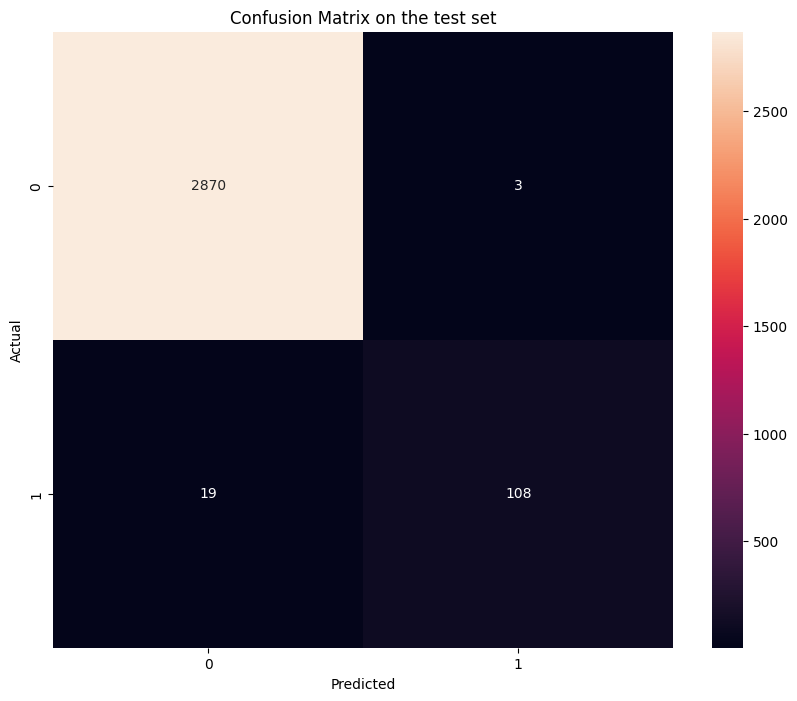

In [27]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(10, 8))
g = sns.heatmap(confusion_matrix(y_test, y_hat_smote),
            annot=True,
            fmt="0.0f")
g.set_xlabel("Predicted")
g.set_ylabel("Actual")
g.set_title("Confusion Matrix on the test set")
plt.show()

In [28]:
# print the classification report
print(classification_report(y_test, y_hat_smote))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2873
           1       0.97      0.85      0.91       127

    accuracy                           0.99      3000
   macro avg       0.98      0.92      0.95      3000
weighted avg       0.99      0.99      0.99      3000



The **recall** evaluation metric is slightly better. 



### Adjusting the probability threshold

In order to plot the ROC curve, you will have to install `plot_metric` using the following command line:

```
!pip install plot_metric
```

In [29]:
!pip install plot_metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
<font color=green>Q15:</font>
<br><font color='green'>
Plot the ROC curve using `BinaryClassification` from `plot_metric.functions`
</font>

---


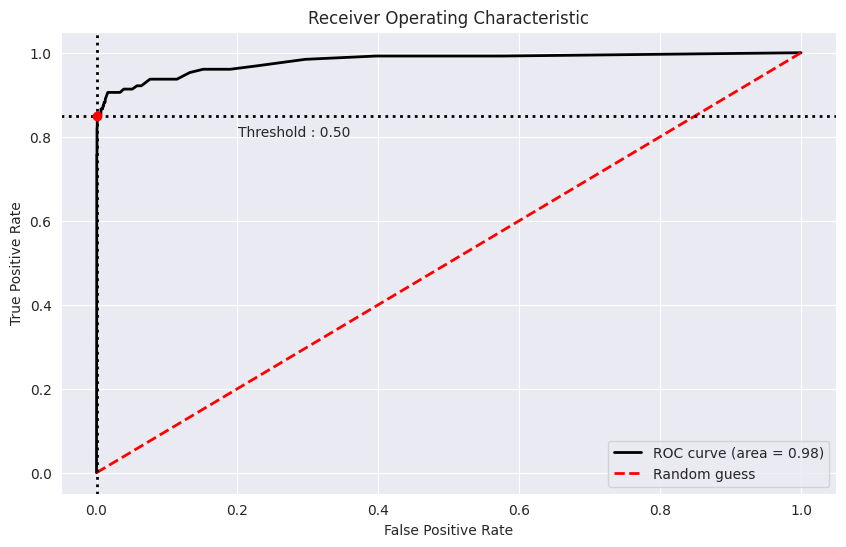

In [30]:
# Import module
from plot_metric.functions import BinaryClassification

# Plot the ROC curve
bc = BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:, 1], labels=[0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

---
<font color=green>Q16:</font>
<br><font color='green'>
Let us fix an objective recall of 0.9. By decreasing the threshold progressively from 1 to 0, determine the maximum threshold for which we can have a recall of 0.9, called `best_threshold`
</font>

---


In [31]:
# Let us find the threshold with the highest recall
from sklearn.metrics import recall_score
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_smote.predict_proba(X_test)[:, 1]

# The objective recall
OBJECTIVE_RECALL = 0.95

# Initialize the best threshold to 0.5
best_threshold = 0.5
# Calculate the binary prediction y_hat associated with the threshold 0.5
y_hat = (y_hat_proba > best_threshold)
# Calculate the recall associated with the threshold 0.5
best_recall = recall_score(y_test, y_hat)

# Find the best threshold 
for th in np.arange(0.01, 1, 0.01)[::-1]:
  # Calculate the binary prediction y_hat associated with the threshold th
  y_pred = (y_hat_proba > th)
  recall = recall_score(y_test, y_pred)
  if recall > OBJECTIVE_RECALL:
    best_recall = recall
    best_threshold = th
    break
print("The best Threshold is {}...The best recall is {}".format(best_threshold, best_recall))

The best Threshold is 0.06999999999999999...The best recall is 0.952755905511811


---
<font color=green>Q17:</font>
<br><font color='green'>
Plot the ROC curve and show the point with the coordinated (FPR(best_threshold), TPR(best_treshold)). 
</font>

---

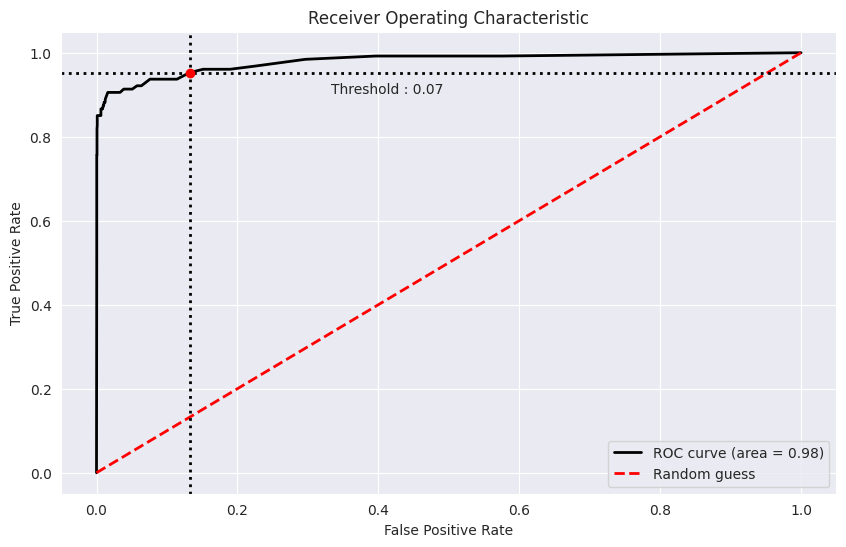

In [33]:
# let's use another probability threshold so that we can get to the elbow position in the above curve
bc = BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:, 1], threshold=best_threshold, labels = [0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

---
<font color=green>Q18:</font>
<br><font color='green'>
* Plot the confusion matrix associated with `best_threshold`
* Print the evaluation metrics associated with `best_threshold` 
</font>

---


In [34]:
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_smote.predict_proba(X_test)[:, 1]

In [35]:
# Calculate the binary prediction y_hat associated with the threshold th
y_hat = (y_hat_proba >= best_threshold)

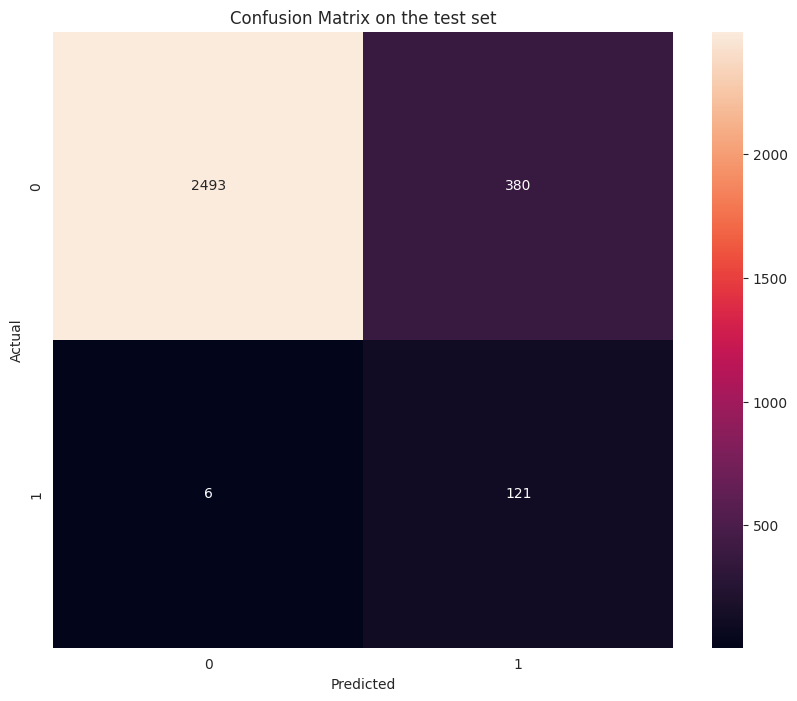

In [36]:
# plot the confusion matrix
fig = plt.figure(figsize=(10, 8))
g = sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            fmt="0.0f")
g.set_xlabel("Predicted")
g.set_ylabel("Actual")
g.set_title("Confusion Matrix on the test set")
plt.show()

In [37]:
# print the classification report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2873
           1       0.24      0.95      0.39       127

    accuracy                           0.87      3000
   macro avg       0.62      0.91      0.66      3000
weighted avg       0.97      0.87      0.91      3000



# Wrap-up

During this session we learned:
* How to load and explore a dataframe.
* What are the most suitable evaluation metrics in the case of an imbalanced dataset, especially the recall and the AUC.
* Resampling techniques including the SMOTE method.
* How to adjust the probability threshold so that it matches the objective error of a business problem.

### Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk

